In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [16]:
result_file = '/home/blevac/Diffusion_Inverse/results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
recon = cont['recon']

dict_keys(['gt_img', 'recon', 'nrmse', 'ssim'])


(-0.5, 319.5, 319.5, -0.5)

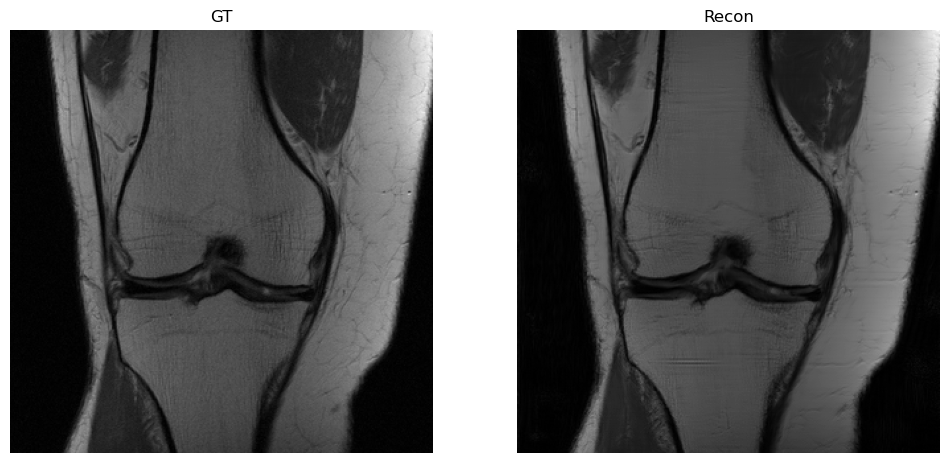

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('GT')
plt.imshow(np.flipud(abs(gt_img[0,0])), cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Recon')
plt.imshow(np.flipud(abs(recon[0,0])),cmap='gray')
plt.axis('off')